# **Enhancing Object Detection in YOLOS-Small through Advanced LoRA Methods**


# NOTE: This file is intended for DISPLAY PURPOSES ONLY and will NOT run independently.  
For full execution, please refer to the complete script:  


```
Enhancing_YOLOS_S_through_Advanced_LoRA_Methods.py
```


This file contains extracted sections to showcase outputs in GitHub.


## **7. Models Comparison**

### Compare Models Results on Test dataset  

In [ ]:
# Define the models and their respective DataFrames
models = ["Baseline", "LoRA", "AdaLoRA", "LoHa", "LoKr"]
dataframes = [baseline_results_df, model_with_LoRA_results_df, model_with_AdaLoRA_results_df,
              model_with_LoHa_results_df, model_with_LoKr_results_df]

# Combine results into a single table
results_list = []
for model, df in zip(models, dataframes):
    row = [model] + df.iloc[0].tolist()  # Extract the first row from each DataFrame
    results_list.append(row)

# Create a consolidated DataFrame
columns = ["Model"] + list(baseline_results_df.columns)
df_results = pd.DataFrame(results_list, columns=columns)

# Display the final comparison table
print("Model Comparison Results:")
display(df_results)


Model Comparison Results:


,Model,mAP,mAP@50,mAP@75,mAP_small,mAP_medium,mAP_large,mAR_1,mAR_10,mAR_100,mAR_small,mAR_medium,mAR_large
0,Baseline,0.332379,0.512714,0.342762,0.097738,0.318657,0.509172,0.283184,0.411286,0.422400,0.150513,0.399143,0.592925
1,LoRA,0.333389,0.516249,0.343871,0.092381,0.319208,0.510270,0.285329,0.416556,0.429368,0.150678,0.409134,0.599635
2,AdaLoRA,0.333447,0.515363,0.344044,0.096612,0.319472,0.511807,0.284558,0.415218,0.427248,0.150288,0.405356,0.599669
3,LoHa,0.332727,0.516466,0.342496,0.092201,0.318329,0.512017,0.285521,0.418458,0.431665,0.150939,0.410583,0.604580
4,LoKr,0.333272,0.514323,0.345513,0.098507,0.318417,0.511198,0.282980,0.414508,0.425934,0.151241,0.403429,0.597001


### Plots for Models Comparison

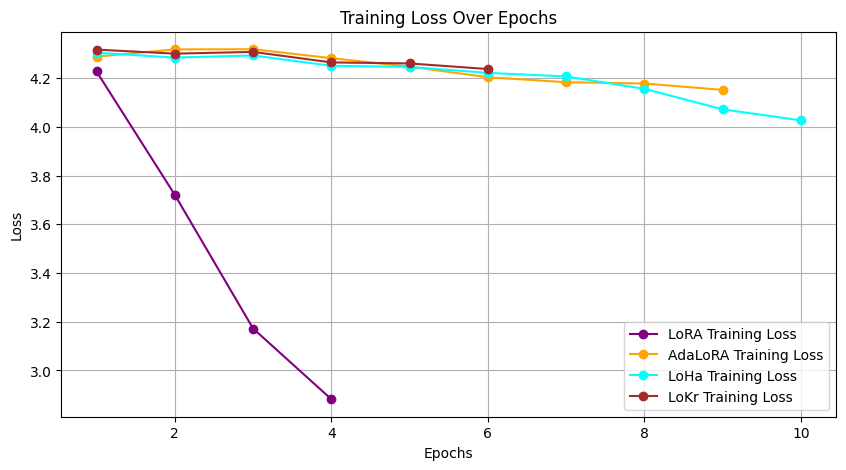

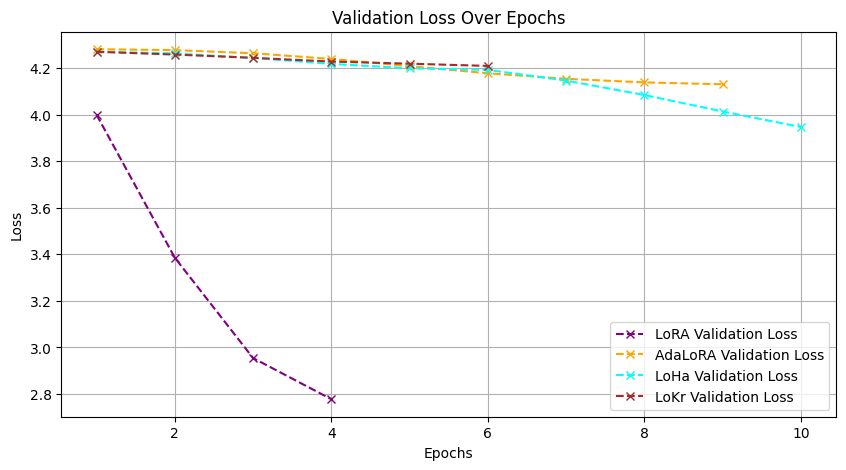

In [ ]:
# Training and Validation Losses over Epochs
colors = {
    'LoRA': 'purple',
    'AdaLoRA': 'orange',
    'LoHa': 'cyan',
    'LoKr': 'brown'
}
epochs_lists = {
    'LoRA': epochs_list_LoRA,
    'AdaLoRA': epochs_list_AdaLoRA,
    'LoHa': epochs_list_LoHa,
    'LoKr': epochs_list_LoKr
}
train_losses_dict = {
    'LoRA': train_total_losses_LoRA,
    'AdaLoRA': train_total_losses_AdaLoRA,
    'LoHa': train_total_losses_LoHa,
    'LoKr': train_total_losses_LoKr
}
val_losses_dict = {
    'LoRA': val_total_losses_LoRA,
    'AdaLoRA': val_total_losses_AdaLoRA,
    'LoHa': val_total_losses_LoHa,
    'LoKr': val_total_losses_LoKr
}


# Train Losses
plt.figure(figsize=(10, 5))
for model, epochs_list in epochs_lists.items():
    train_losses = train_losses_dict.get(model, [])
    plt.plot(epochs_list, train_losses, label=f'{model} Training Loss', linestyle='-', marker='o', color=colors.get(model, 'black'))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Validation Losses
plt.figure(figsize=(10, 5))
for model, epochs_list in epochs_lists.items():
    val_losses = val_losses_dict.get(model, [])
    plt.plot(epochs_list, val_losses, label=f'{model} Validation Loss', linestyle='--', marker='x', color=colors.get(model, 'black'))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


### Best Model - AdaLoRA

<ipython-input-36-cc0eebcbf7aa>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_AdaLoRA = torch.load("adalora_model.pth", map_location=torch.device("cuda" if tor

Detected sports ball with confidence 1.0 at location [49.86, 193.68, 188.72, 328.5]
Detected person with confidence 0.896 at location [140.0, 22.34, 462.06, 475.72]
Detected person with confidence 0.998 at location [425.44, 29.51, 618.74, 477.08]
Detected person with confidence 0.997 at location [16.7, 21.51, 461.03, 474.98]


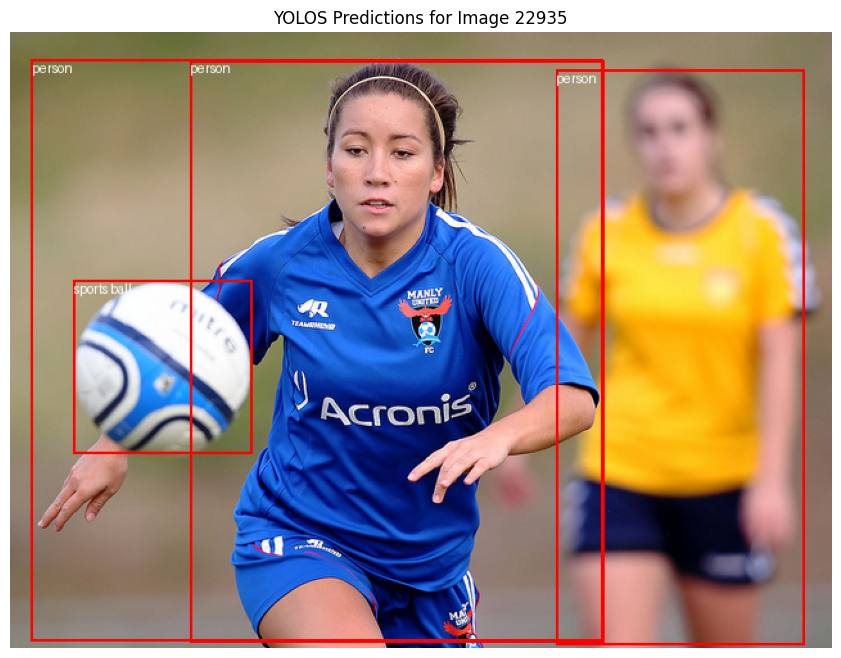

900it [03:48,  3.93it/s]


mAP@[0.5:0.95]: tensor(0.3334)
Detailed mAP results: {'map': tensor(0.3334), 'map_50': tensor(0.5154), 'map_75': tensor(0.3440), 'map_small': tensor(0.0966), 'map_medium': tensor(0.3195), 'map_large': tensor(0.5118), 'mar_1': tensor(0.2846), 'mar_10': tensor(0.4152), 'mar_100': tensor(0.4272), 'mar_small': tensor(0.1503), 'mar_medium': tensor(0.4054), 'mar_large': tensor(0.5997), 'map_per_class': tensor([0.4654, 0.2036, 0.2597, 0.3399, 0.6579, 0.6084, 0.5063, 0.2001, 0.1532,
        0.1220, 0.6348, 0.3589, 0.2783, 0.2291, 0.1774, 0.6745, 0.7479, 0.5787,
        0.4598, 0.5005, 0.6151, 0.6985, 0.5220, 0.5595, 0.0764, 0.3613, 0.1264,
        0.2628, 0.2267, 0.5705, 0.1442, 0.2185, 0.2534, 0.1647, 0.3303, 0.2667,
        0.5609, 0.3011, 0.5552, 0.2183, 0.2336, 0.1859, 0.3265, 0.0701, 0.1376,
        0.2844, 0.2586, 0.2842, 0.4100, 0.2020, 0.3912, 0.1244, 0.2162, 0.5127,
        0.2635, 0.2566, 0.1864, 0.3722, 0.2108, 0.3070, 0.2767, 0.4643, 0.4853,
        0.4865, 0.4186, 0.2104, 0.3803, 

<ipython-input-36-cc0eebcbf7aa>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", 15)


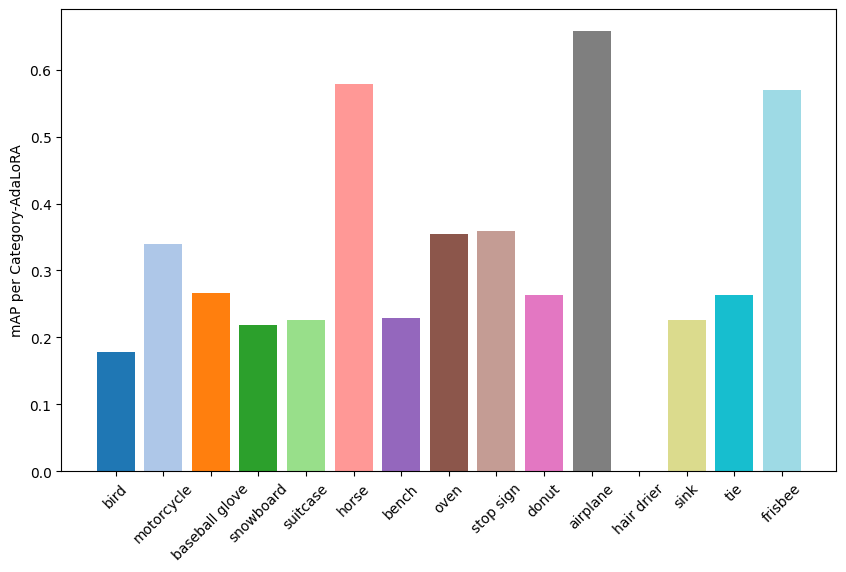

In [ ]:
model_with_AdaLoRA = torch.load("adalora_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
best_model_results = evaluate_model(model_with_AdaLoRA, processor, test_dataset, yolos_categories, add_class_metrices=True)
print("Best Model is AdaLoRA with Performance (mAP) of", best_model_results["map"])

# validate map_per_class values and then plot
if best_model_results["map_per_class"].numel() == 1 and best_model_results["map_per_class"].item() == -1:
    print("Warning: No valid data for per-class mAP.")
else:
    category_map = {coco_categories[i]: best_model_results["map_per_class"][i].item() for i in range(len(coco_categories))}
    selected_categories = random.sample(list(category_map), min(15, len(category_map)))
    color_map = plt.cm.get_cmap("tab20", 15)
    colors = [color_map(i) for i in range(15)]
    plt.figure(figsize=(10, 6))
    plt.bar(selected_categories, [category_map[cat] for cat in selected_categories], color=colors)
    plt.xticks(rotation=45)
    plt.ylabel('mAP per Category-AdaLoRA')
    plt.grid(False)
    plt.show()
